GENETIC ALGORITHM - Giải thuật di truyền 
solving regression problems

1. Introduction to Genetic Algorithm(GA)
GA dựa trên công trình nghiên cứu sinh học tiến hóa hiện đại của Charles Darwin (năm 1859)
GA là một nhánh của Evolutionary Algorithms
GA giải quyết các bài toán tối ưu chấp nhận kết quả xấp xỉ gần đúng
Khác với leo đồi(GD), GA như một dạng heuristic search để tìm optimal solution
trong một số trường hợp, GA có thể tìm kết quả tối ưu hơn GD 

2. Một số thuật ngữ liên quan giữa di truyền và tối ưu. 

        GEN                                    Opt
An individual - Cá thể                    một giải pháp(hàm toán học với bài toán regression)
A population - Quần thể                   tập các giải pháp
fitness measure - độ đo thích nghi        độ đo độ tốt của giải pháp(hiệu năng tối ưu)
A generation  - Thế hệ
A variation operation - toán tử biến đổi cá thể

giải thích một số thuật ngữ sử dụng và ví dụ bên kịch bản tối ưu toán học
Chromosome - NST: 
    tập các gens được liên kết mang thông tin di truyền. 
    một đoạn của hàm toán học đại diện bởi các tham số.
Crossover - trao đổi chéo: 
    kết hợp các NST trong bộ Gen của thế hệ cha sinh ra thế hệ con. 
    kết hợp các đoạn tham số trong hàm toán học của thế hệ cha sinh ra thế hệ hàm toán học con.
Gene - Gen: 
    đơn vị nhỏ nhất mang thông tin di truyền của một cá thể.
    đơn vị tham số của hàm toán học.
Genome - bộ gen:
    toàn bộ thông tin di truyền của một cá thể.
    toàn bộ tham số của một hàm toán học.
Fitness:
    độ thích nghi của một cá thể.
    độ tối ưu của hàm toán học.
Locus:
    vị trí gen trong NST
    vị trí của tham số trong hàm toán học
Mutation - đột biến:
    sự thay đổi trong trình tự gen gây đột biến gen.
    sự thay đổi các tham số trong hàm toán học.
Population:
    tập hợp các cá thể được xem xét trong quá trình tiến hoá.
    tạp hợp các giải pháp cho một vấn đề tối ưu.

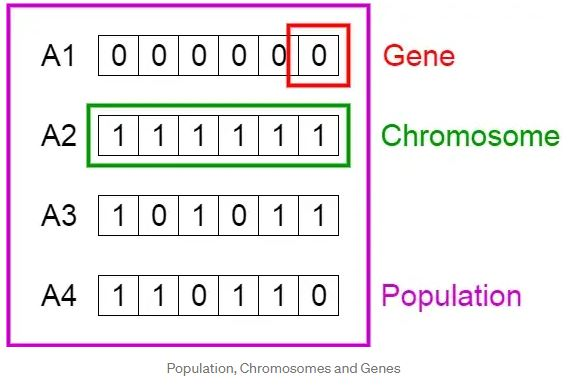

In [11]:
from IPython import display
display.Image("./images/Defination.JPG")

3. giải thuật
- Stopping criterion - tiêu chí dừng: điều kiện để kết thúc giải thuật khi các giải pháp đủ tốt.
- Selection - chọn lọc: phương thức chọn ra các các thể được sử dụng để tạo thế hệ tiếp theo.
- Variation - biến đổi: áp dụng các thay đổi lên các cá thể được lựa chọn. được thực hiện bởi đột biến và trao đổi chéo.
Genetic Algorithm:
--------------------------------------------
begin
    count = 0
    initialize population
    evaluate population
    while not termination condition do
    begin
        count = count + 1
        select individuals for reproduction
        apply variation operators
        evaluate offspring
    end
end
---------------------------------------------

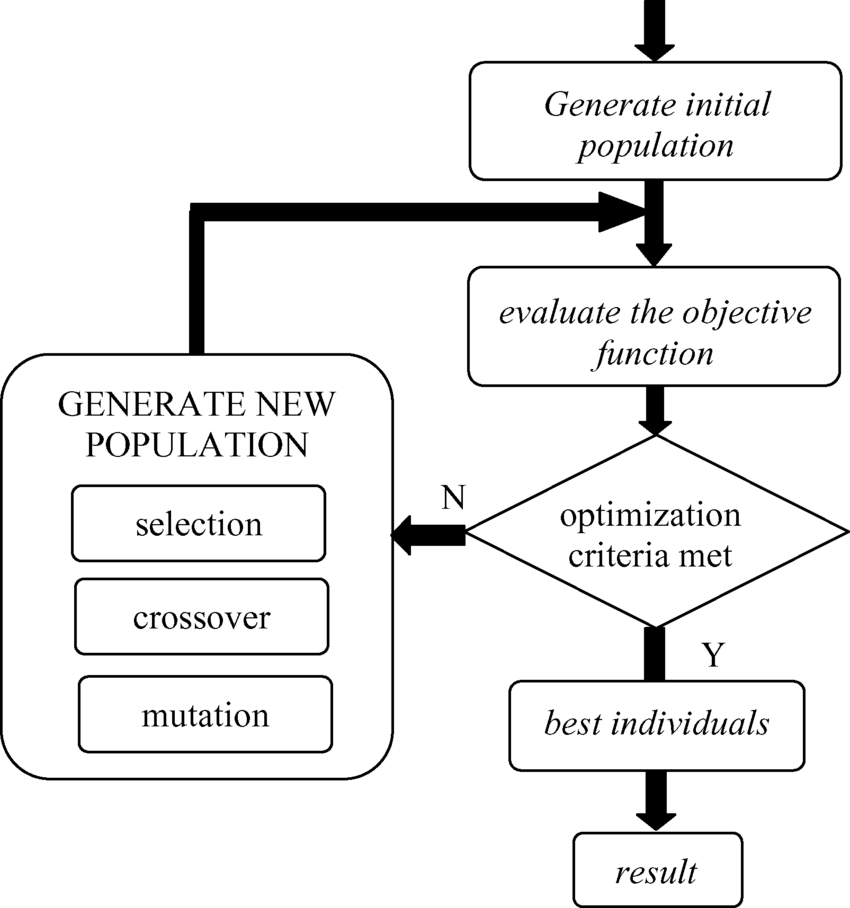

In [9]:
from IPython import display
display.Image("./images/Basic-structure-of-a-simple-genetic-optimization-algorithm.png")

4. Ứng dụng giải thuật di truyền giải quyết bài toán hồi quy tuyến tính - linear regression
- hàm f của linear regression có thể xấp xỉ gần đúng nên có thể áp dụng GA để giải quyết.

mô tả bài toán linear regression:
-----------------------------------------------------------
y = f(X)
Inputs: tập các mẫu có vector đặc trưng X dùng để tiên đoán outputs.
Outputs: biến y được tiên đoán .
Parameters: hàm f mô tả quan hệ giữa inputs và outputs.
Goal: tìm hàm f với độ chính xác cao nhất có thể
-----------------------------------------------------------  

Ví dụ giải thuật di truyền tìm f:
1. import các thư viện và hàm cần thiết.

In [ ]:
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv

2. Sinh dữ liệu
giả sử cần dữ liệu tuân theo hàm 
  y = 0.4*x0 - 0.3*x1 + 0.2*x2 -0.1*x3
để đơn giản tạm bỏ qua bias 

In [ ]:
def generate_data():
    coeff = [0.4, -0.3, 0.2, -0.1]
    x = [[random() for j in range(len(coeff))] for i in range(1000)]
    y = [dot(i, coeff) for i in x]
    return array(x), array(y)

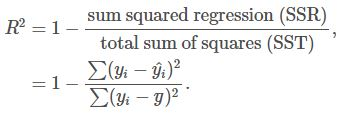

In [1]:
from IPython import display
display.Image("./images/R2.JPG")

2. Hàm giải quyết bài toán linrg đơn giản với giải phương trình đạo hàm bằng 0:
Sum of Squares Total (SST) – phương sai của y_true.
Sum of Squares Regression (SSR) – tổng bình phương sai khác giữa y_hat và y_true
COD =  R2*100 %, (-:100] càng lớn càng tốt 
av_error = SSR/n :giá trị trung bình bình phương lỗi hồi quy.

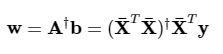

In [12]:
from IPython import display
display.Image("./images/state.JPG")

In [ ]:
def multiple_linear_regression(inputs, outputs):
    X, Y = array(inputs), array(outputs) # Y là y_true
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff, 'error': av_error}

3. Điều kiện dừng:
 ở đây sử dụng điều kiện dừng là COD của cá thể tốt nhất của thế hệ >= 99%
 hoặc dừng khi đến thế hệ thứ max_generations
 có thể dùng các điều kiện dừng khác như error

In [ ]:
def check_termination_condition():
    if ((best_individual['COD'] >= 99.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False

4. Hàm tạo cá thể - sinh ngẫu nhiên các hệ số trong khoảng [0:1]
    mỗi cá thể là một list hệ số của hàm f.

In [ ]:
def create_individual(individual_size):
    return [random() for i in range(individual_size)]

5. Hàm tạo quần thể.
    một quần thể là một list cá cá thể

In [ ]:
def create_population(individual_size, population_size):
    return [create_individual(individual_size) for i in range(population_size)]

6. Hàm tính độ thích nghi của một cá thể.
các độ đo tương tự như phương pháp nhân ma trận ở trên

In [ ]:
def get_fitness(individual, inputs):
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]
        ).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]
        ).sum()
    COD = (1 - (SSR / SST)) * 100.0
    average_error = (SSR / len(outputs))
    return {'COD': COD, 'error': average_error, 'coeff': individual}

7. Hàm đánh giá quần thể
 lựa chọn độ đo error để đánh giá quần thể.
 trả về các danh sách gồm selection_size  các cá thể tốt nhất

In [ ]:
def evaluate_population(population):
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
    print('Error: ', best_individuals[0]['error'],
          'COD: ', best_individuals[0]['COD'])
    return best_individuals

8. Toán tử biến đổi

8.1. Trao đổi chéo
Một số phương pháp trao đổi chéo
N-Point Crossover: chọn ra N điểm để cắt ra N+1 NST tương ứng trên bộ gen của cá thể cha.
    +Single Point Crossover
    +Two-Point Crossover
Uniform Crossover: từng hệ số của hàm thế hệ con được lựa chọn ngẫu nhiên từ các hệ số tương ứng từ 2 hàm cha 

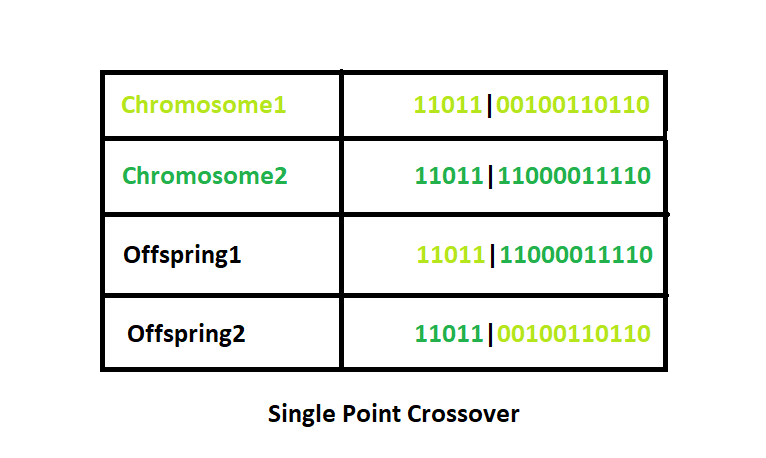

In [5]:
from IPython import display
display.Image("./images/singleCrossover1-2.png")


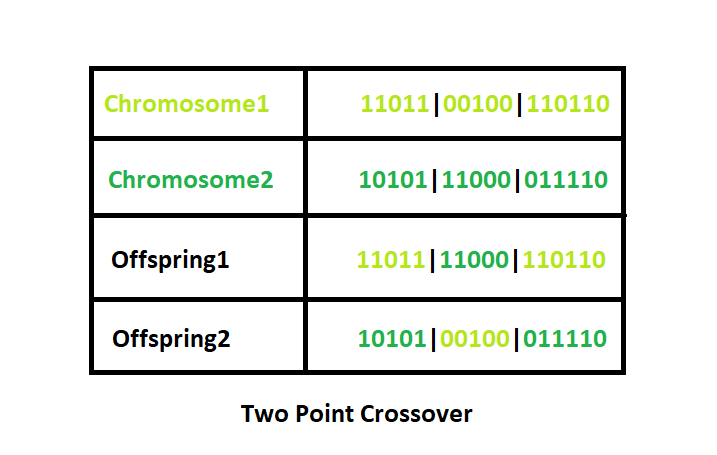

In [6]:
display.Image("./images/twopointCrossover1-2.png")


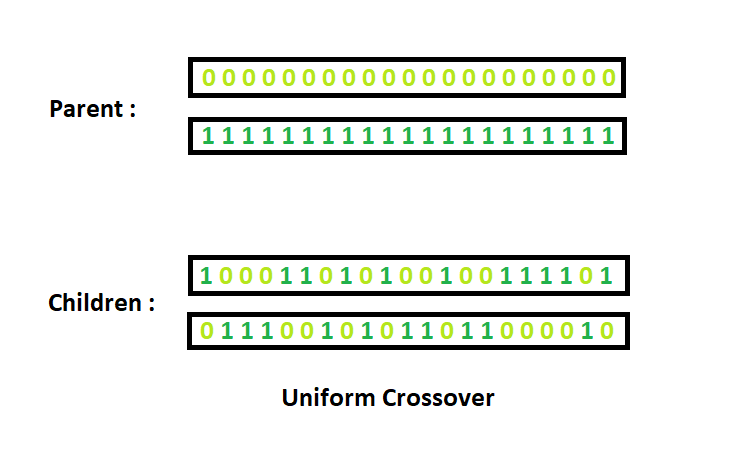

In [7]:
display.Image("./images/uniformCrossover-2.png")

Hàm Uniform Crossover

In [ ]:
def crossover(parent_1, parent_2):
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]

8.2. Đột biến
Lựa chọn ra số lượng vị trí gen đột biến
thay đổi giá trị hệ số này bằng 1 giá trị ngẫu nhiên 

In [ ]:
def mutate(individual):
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual

9. Hàm sinh thế hệ mới từ các cá thể được chọn.
  lấy mẫu population_size lần ngẫu nhiên 2 cá thể cha từ các cá thể được chọn.
  trao đổi chéo các cặp này để sinh ra con cái.
  lựa chọn ngẫu nhiên các cá thể để đột biến.
  kết quả được một thế hệ mới. 


In [ ]:
def get_new_generation(selected_individuals):
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

10. Thực hiện thuật toán

In [ ]:
inputs, outputs = generate_data()
individual_size = len(inputs[0])
population_size = 1000
selection_size = floor(0.1*population_size)
max_generations = 50
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25
best_possible = multiple_linear_regression(inputs, outputs)
best_individuals_stash = [create_individual(individual_size)]
initial_population = create_population(individual_size, 1000)
current_population = initial_population
termination = False
generation_count = 0
while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))